# Part Five

## Project Objective:

1. List down all possible dimensionality reduction techniques that can be implemented using python.

2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('X.npy')
Y = np.load('Y.npy')

print(X.shape)
print(Y.shape)


(2062, 64, 64)
(2062, 10)


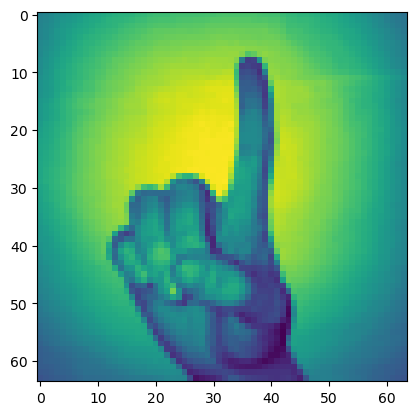

In [2]:
plt.imshow(X[1000])

In [3]:
Z = pd.DataFrame(Y)
Z=9-Z.idxmax(axis=1)
Z

0       9
1       9
2       9
3       9
4       9
       ..
2057    0
2058    0
2059    0
2060    0
2061    0
Length: 2062, dtype: int64

In [4]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Z, test_size=0.3, random_state=1)

In [5]:
clf = svm.SVC(C=10)

In [6]:
clf.fit(X_train , y_train)

SVC(C=10)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.8546042003231018


In [9]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

291

In [10]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [11]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 291)
recovered shape: (1443, 4096)


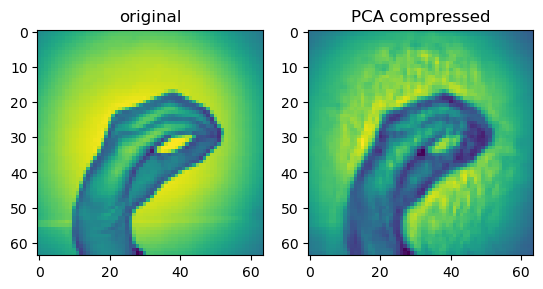

In [12]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[1000].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[1000].reshape((64,64)))
plt.show(block=True)

In [13]:
clf = svm.SVC(C=10)

In [14]:
clf.fit(X_reduced , y_train)

SVC(C=10)

In [15]:
X_test_reduced = pca.transform(X_test)
print("reduced test shape: " + str(X_test_reduced.shape))

reduced test shape: (619, 291)


In [16]:
y_pred = clf.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_pred)))

accuracy: 0.8594507269789984


### Thus, we see that we have a very minor improvement in accuracy even after reducing the dimesions of the image dataset.